<a href="https://colab.research.google.com/github/polly-cai/HDS-Blog/blob/main/Final_Assignment_polly_cai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](https://drive.google.com/uc?export=view&id=1DXUVHxd4t15mfuqMgMCLnsP4jWVI5EWz)

---

<br>
© 2022 Copyright The University of New South Wales - CRICOS 00098G

**Authors**: Oscar Perez-Concha and Zhisheng (Sandy) Sa.

**Communications**: If you have any questions, please email Oscar and Sandy at: o.perezconcha@unsw.edu.au and z.sa@unsw.edu.au

**Please use email exclusively for communication with us regarding this assignment.**

# Final Assignment 



---



#####################################################################################


**Name and Surname: Polly Cai**

**Honour Pledge** <p>
    
    
Declaration: <p>
    
    
I declare that this assessment item is my own work, except where acknowledged, and has not been submitted for academic credit elsewhere or previously, or produced independently of this course (e.g. for a third party such as your place of employment) and acknowledge that the assessor of this item may, for the purpose of assessing this item: 

1. Reproduce this assessment item and provide a copy to another member of the University; and/or 

2. Communicate a copy of this assessment item to a plagiarism checking service (which may then retain a copy of the assessment item on its database for the purpose of future plagiarism checking). 

#####################################################################################

---
# 1.  Health Data Science Scenario
 
## 1a. Research Question

Our hospital has been very proactive in terms of analysing data of its electronic medical record (EMR). By analysing the data, they have made very interesing discoveries:

1. They identified that readmitted patients are not only those who were sicker in the first admission, but those who had less support at home after discharge or those patients that did not have a medical follow-up after discharge.
2. Readmitted patients experienced high levels of emotional stress.
3. Readmitted patients were at much higher risk of acquiring new infections while at hospital.
4. Readmissions are highly costly. Patients that were readmitted for the reasons cited above tended to be sicker than they were when they were first admitted and their length of stay was significantly longer than their first admission.

Our hospital has trialed a "specialised unit" that coordinates the patient's discharge. A team of nurses and OTs visit the patient's home after discharge. The frequency of the visits depends upon an assessment made before discharge, but the average number of visits is 5 across the board. Amongst other things, they make sure that the wounds are healing properly, medication is taken, that there is coordination with a GP in place and basic daily activities can be done, such as moving around their home, toilet, cooking, ...
In addition, the specialised unit regularly contacts the patients via telephone to check that everything is going well. The patients can also contact the specialised unit if they need any help. 

This pilot has drastically reduced the number of readmissions. 

In addition, the cost of operating the specialised unit was much cheaper than the cost of readmissions.

In terms of budget:
1. A day in hospital costs 5,000 dollars per day on average; readmitted patients tend to stay an average of 4 days.
2. A home visit of the specialised unit costs 400 dollars; the average number of visits is 5. 
3. No targeted patients: 0 dollars

Our hospital is now ready to roll out and implement the specialised unit service to all patients at risk for readmission. 
The problem is that a priori, they do not know which patients are at risk of readmission. Thus, they do not know the patients they should be targeting.


<b><font color=green>Goal/Research Question: </font>
1. The hospital needs a machine learning algorithm to predict which patients should participate in this intervention. The prediction will be done just before discharge. They are hiring you to build this algorithm.

2. You will need to explain to the hospital managers the performance of your algoritm, so they can make an informed decision whether to use your algorithm or not.



---



## 1b. Instructions

1. We are going to deliver one predictive model to predict readmission to hospital within 30 days of discharge. 

2. Check and study the data provided. Read the data dictionary carefully and check again the plots and graphs created in the exercises corresponding to weeks 1, 2 and 3. 

3. Since the data have been already provided by the hospital, we are going to skip the next steps of the health data science workflow (see image below). 
  - Step 3 and substeps 3a,3b,3c,3d,3e: Data Gathering.

4. Step 4, substep 4a: Data visualization. Visualize the data in your draft, but do not include the graphs in the final submission.

5. The hospital wants the model to capture as many "readmissions" as posible (true positives) even at the expense of <font color='green'><b> moderately</b> </font> increasing the number of false positives <font color='green'><b>  within reason</b></font> (that is, patients that are not at risk of readmission that are classified as readmission). 

6. Nevertheless, we must take into account that the hospital does not have unlimited resources, so they cannot considered a high number of patients at risk of readmission because the cost of the "specialised unit" would be very high.  

7. You will design several machine learning algorithms, choose one, and give a rationale explaining why you choose that algorithm. 

    * Build some predictive models to predict readmission to hospital within 30 days of discharge using:  
        *  'Logistic Regression Classifiers' 
        * 'Random Forest Classifier'. 
        
8. Use the `classification_report` and confusion matrix metrics to evaluate your models. If you use other metrics, such as the ROC curve, do not include them in the final submission.

9. <b> Very Important: Justify your decisions and why they were made in the space provided.</b>   Write <b>one or two sentences</b> for each section before each block of Python code with the description of what the blocks do; explanations must be clear; no “sanity checks” (although these checks are encouraged during the construction of the algorithms); 

10. Print clear labels in the printed results and explain in short and concise sentences the steps that you followed. 

11. Comment and document your code, as you will most likely later work in teams developing such algorithms.

12. Format: Jupyter Notebook.
13. Programming Language: Python.
14. Platform: Google Colab.
15. The assignment will be mark using the rubric provided in the outline

16. **Submission: Upload the Jupyter Notebook in OpenLearning, in the section provided for that and on your GitHub space. The application wil close at exactly the date and time of the deadline.**

17. Marks will be deducted if these instructions are not followed.

18. <b><font color=green>Only the final version of the document must be submitted. </font></b>. 

19. Add your name and surname to the name of this document. For example. `Final-Assignment-Oscar-PerezConcha.ipynb`

20. Each question is 10 marks, except question 8 that is 20 marks.

21. If you have any questions, please email Oscar and Sandy at:
o.perezconcha@unsw.edu.au and z.sa@unsw.edu.au

![alt text](https://drive.google.com/uc?export=view&id=105SGqeyo8RgLhSO8mN7ZE5OsG0YiLPKt)



---



In [18]:
# check required libraries are installed if not calling system to install
import sys
import subprocess
import pkg_resources

required = {'numpy', 'pandas', 'plotnine', 'matplotlib', 'seaborn', 
            'grid', 'shap', 'scikit-learn'}
installed = {pkg.key for pkg in pkg_resources.working_set}
missing = required - installed

if missing:
    print('Installing: ', missing)
    python = sys.executable
    subprocess.check_call([python, '-m', 'pip', 'install', *missing], stdout=subprocess.DEVNULL)
# delete unwanted variables
del required 
del installed 
del missing

Installing:  {'grid', 'shap'}


In [19]:
# Mount Google Drive
# We do not need to run this cell if you are not running this notebook in Google Colab

if 'google.colab' in str(get_ipython()):
    from google.colab import drive # import drive from Gogle colab
    root = '/content/drive'     # default location for the drive
    # print(root)                 # print content of ROOT (Optional)
    drive.mount(root)
else:
    print('Not running on CoLab')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Change the project paths and the paths according to where you have placed your files: 

In [20]:
from pathlib import Path

if 'google.colab' in str(get_ipython()):
    # EDIT THE PROJECT PATH IF DIFFERENT WITH YOUR ONE
    project_path = Path(root) / 'MyDrive' / 'HDAT9500' / 'final-assignment'

    # OPTIONAL - set working directory according to your google drive project path
    # import os
    # Change directory to the location defined in project_path
    # os.chdir(project_path)
else:
    project_path = Path()



---
Function to plot the confusion matrix:


In [21]:
def plot_confusion_matrix(confusion_matrix):
  # visualise the confusion matrix
  labels = ['No', 'Yes']
  ax = plt.subplot()
  sns.heatmap(confusion_matrix, annot = True, fmt = '.0f', ax = ax, cmap = 'viridis')

  # labels, titles and ticks
  ax.set_xlabel('Predicted labels')
  ax.set_ylabel('True labels')
  ax.set_title('Confusion Matrix')
  ax.xaxis.set_ticklabels(labels)
  ax.yaxis.set_ticklabels(labels)

---
# Question 1: Docstring

Create a docstring with:
1. The final aim of our program (50 words limit).
2. The variables and constants that you will use in this exercise (data dictionary). It is expected that you choose informative variable names and document your program (both docstrings and comments). 
3. Divide the docstring in sections. One section per question.
---

<b> Final aim of our program:</b>

To reduced the number of readmissions in the hospital.

################################################################################

<b> Constants and variables in alphabetical order:</b>

---
<b> Aim of this program </b>

To build a predictive model to predict readmission to hospital within 30 days of discharge.

---

---
<b> Question 1: </b>

* `path`: pickle file path
* `df`: the hospital readmission dataset
* `readmission`: converted readmission record

---

(...)

---
<b> Question 4: Training, and hyper-parameter tuning of the Logistic Regression model.</b>

* `hyperparameters`: hyperparameters set for the model
* `lr`: the logistic regression model
* `grid_lr`: perform 3-fold cross-validation for the grid search

---

<b>Question 5: Evaluation of the Logistic Regression: </b>
* `lr_y_train_prediction`: the prediction results of the training set
* `cm_lr_train`: confusion matrix of the training set

---


---

################################################################################



---



---
# Question 2: Read and check the `pickle` provided. Prepare the data so they can be used by the algorithms that you are going to create.
---

<b> Rationale: What are you doing to solve this question?-75 words limit:</b>


To read and clean the dataset by removing the irrelevant admissin_id and patient_id columns, as well as missing values in our training model, then covert categrical readmission status to numeric labels. 



################################################################################

In [22]:
# Python code here (15 lines limit)
import pickle
import pandas as pd

path = open('/content/drive/MyDrive/Colab Notebooks/9800/final-assignment-polly-cai/data/hospital_data_final_assignment.pickle', 'rb')
df = pickle.load(path)
df = df.drop("admission_id", axis=1,inplace=False) # remove admission_id
df = df.drop("patient_id", axis=1,inplace=False) # remove patient_id
df = df.dropna(how='any') # Remove empty values
readmission = {"no":0, "yes":1} # 0 = no readmission, 1 = readmission
df["readmission"] = df["readmission"].map(readmission) # converting
x = df.iloc[:,0:-1]
y = df.iloc[:,-1]

---

---
## Question 3: Divide the data into 80% training, 20% test, random seed of 42. Set the other hyper-parameters as you consider appropriate
---


<b> Rationale: What are you doing to solve this question?-75 words limit:</b>

To split the dataset to 80% as the training set and 20% as the test set.

################################################################################

In [23]:
# Python code here (2 lines limit, and 1 cell limit)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2) # divide data to 2 sets



---



---
## Question 4: Training, and hyper-parameter tuning of the Logistic Regression model.  

Hyper-parameters: 

- `C` values: 10, 100.
- `class_weight`: only two pairs. Choose one of these two combinations and explain why.

    * A weight of (80% for class 1, 20% for class 0) and (70% for class 1, 30% for class 0)
    * A weight of (80% for class 0, 20% for class 1) and (70% for class 0, 30% for class 1). 

- `penalty` values: l1, l2.
- 3-fold cross-validation for the grid search.
- `f1` as the score to choose the best model in the grid search.
- `n_jobs`=-1.
- do not include the heatmaps in the final submission.
- do not change these hyper-parameters, 
- keep the remaining set of hyper-parameters in the default state. 
---


<b> Rationale: What are you doing to solve this question?-75 words limit:</b>

To train and fit the logistic regression model by setting hyper-parameters.

################################################################################

In [24]:
# Python code here (15 lines limit, and 2 cells limit)
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

hyperparameters = {'C':[10,100],
              'class_weight':[{0:0.2,1:0.8},{0:0.3,1:0.7}], # as there are less number of readmission in the sample data, so higher % allocated to them can increase the sample weight
              'penalty':['l1','l2']} # define hyperparameters
lr = LogisticRegression(solver='liblinear') # the logistic regression model
grid_lr = GridSearchCV(estimator=lr,
                       param_grid=hyperparameters,
                       cv=3, scoring="f1",
                       n_jobs=-1) # grid method paramater optimisation
grid_lr.fit(X=x_train, y=y_train) # model training
print(grid_lr.best_score_, grid_lr.best_params_)


0.9321445022253552 {'C': 10, 'class_weight': {0: 0.3, 1: 0.7}, 'penalty': 'l2'}




---



---
## Question 5: Evaluation of the Logistic Regression model on the training and test sets. Use the function `plot_confusion_matrix(confusion_matrix)` provided above.
---

<b> Rationale: What are you doing to solve this question?-75 words limit:</b>


Define the performance of the logistic regression model fitted before to determine the compatibility of the model from the predicted results and the actual readmission data.

################################################################################

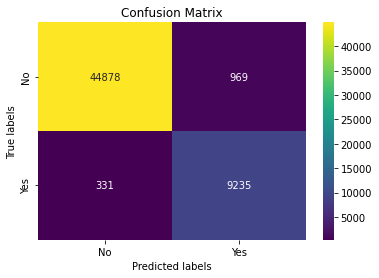

In [25]:
# Python code here (10 lines limit, and 2 cells limit)
from matplotlib import pyplot as plt 
import seaborn as sns

from sklearn.metrics import confusion_matrix
lr_y_train_prediction = grid_lr.predict(x_train) # get the training set prediction results
cm_lr_train = confusion_matrix(y_train, lr_y_train_prediction) # calculate confusion matrix of the training set
plot_confusion_matrix(cm_lr_train)

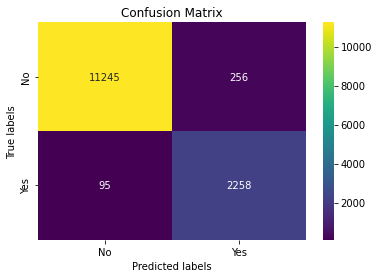

In [26]:
lr_y_test_prediction = grid_lr.predict(x_test) # get the test set prediction results
cm_lr_test = confusion_matrix(y_test, lr_y_test_prediction) # calculate confusion matrix of the test set
plot_confusion_matrix(cm_lr_test)



---



---
## Question 6: Training, and hyper-parameter tuning of the Random Forest model.  

Fixed hyper-parameters (do not change the values of these hyper-parameters): 

- `n_estimators`: 150, 200
- `class_weight`: Only two pairs. Choose one of these two combinations and explain why.
1. A weight of (80% for class 1, 20% for class 0) and (70% for class 1, 30% for class 0)
2.  A weight of (80% for class 0, 20% for class 1) and (70% for class 0, 30% for class 1). 
- 3-fold cross-validation for the grid search.
- `f1` as the score to choose the best model in the grid search.
- `n_jobs`=-1
- do not include the heatmaps in the final submission

Other hyper-parameters: 

- `max_features`: 20, 30
- `min_samples_split`: 20, 25
- you can change the previous hyper-parameters (`max_features` and `min_samples_split`) or add other hyper-parameters if you wish. An explanation must be given to why you made that decision. 

---


<b> Rationale: What are you doing to solve this question?-75 words lilmit:</b>


Continue to set more hyper-parameters and build a random forest model.


################################################################################

In [27]:
from inspect import Parameter
# Python code here (15 lines limit, and 2 cells limit)
from sklearn.ensemble import RandomForestClassifier
rf_paramaters = {'n_estimators':[150,200], 'class_weight':[{0:0.2,1:0.8},{0:0.3,1:0.7}], 'max_features':[20,30],'min_samples_split':[20,25]}
rf = RandomForestClassifier(n_jobs=-1)
grid_rf = GridSearchCV(estimator=rf,param_grid=rf_paramaters,cv=3,scoring="f1",n_jobs=-1)
grid_rf.fit(X=x_train,y=y_train)
print(grid_rf.best_score_, grid_rf.best_params_)

0.9464223000243862 {'class_weight': {0: 0.3, 1: 0.7}, 'max_features': 30, 'min_samples_split': 20, 'n_estimators': 150}


---

---
## Question 7: Evaluation of the Random Forest model on the training and test sets. Use the function `plot_confusion_matrix(confusion_matrix)` provided above.
---

<b> Rationale: What are you doing to solve this question?-50 words limit:</b>

Define the performance of the random forest model fitted before to determine the compatibility of the model from the predicted results and the actual readmission data.

################################################################################

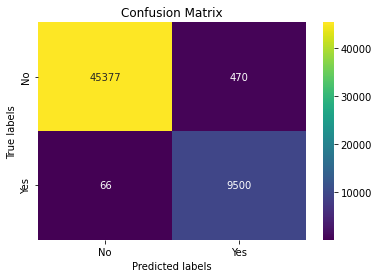

In [34]:
# Python code here (10 lines limit, and 2 cells limit)
from sklearn.metrics import confusion_matrix

rf_y_train_prediction = grid_rf.predict(x_train)
cm_rf_train = confusion_matrix(y_train, rf_y_train_prediction)
plot_confusion_matrix(cm_rf_train)

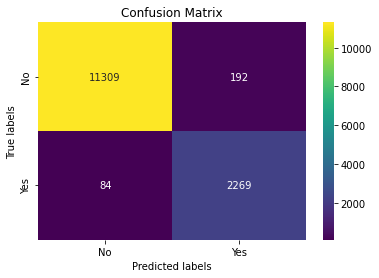

In [33]:
rf_y_test_prediction = grid_rf.predict(x_test)
cm_rf_test = confusion_matrix(y_test, rf_y_test_prediction)
plot_confusion_matrix(cm_rf_test)



---



---
## Question 8: Based on the research questions and the instructions; What model would you choose if any? Would you deploy this model?  - 300 words limit.
---

<b> 300 words limit </b>

The confusion matrix results showing that there is higher number of correct prediction results in the random forest model (2269) compared to the logistic regression model (2258) in the test set.
I would deploy the **random forest model** and integrate it into the hospital data environment where it can take in an input and return an output.


################################################################################



---



---
## Question 9: Use SHAP for the final model and give some explanation of what you observe. If you haven't chosen any model in question 8, choose the best model according to the evaluation metrics. Comment the results.
---

<b> Explanation of what you observe - 100 words limit:</b>

The weight of the binary results are equal from the SHAP plot.


################################################################################

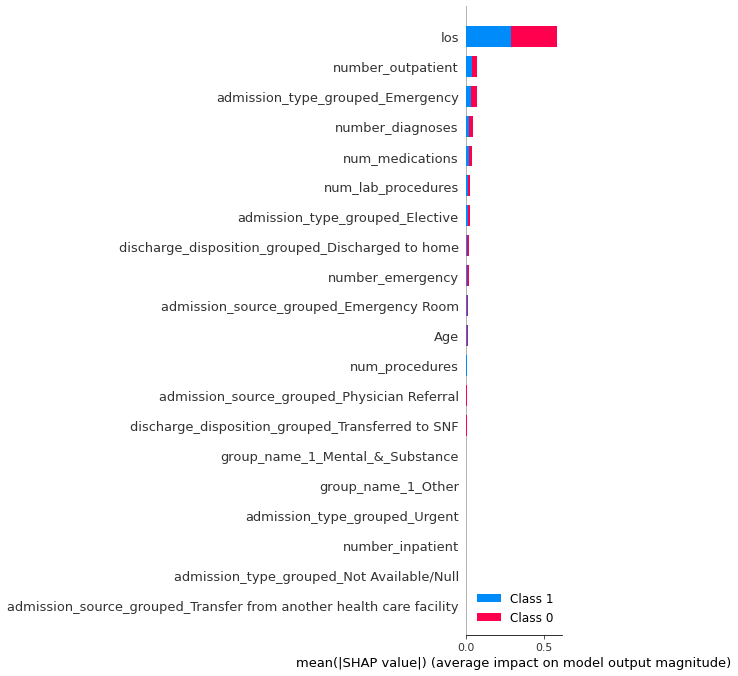

In [31]:
# Python code here (10 lines limit, and 2 cells limit)
import shap
model = grid_rf.best_estimator_
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(x_test)
shap.summary_plot(shap_values, x_test, plot_type="bar", show=True)



---



© 2022 Copyright The University of New South Wales - CRICOS 00098G